<a href="https://colab.research.google.com/github/subhash505/datat_analytics/blob/main/upload_assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from math import sqrt


import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
files.upload()

Saving perrin-freres-monthly-champagne-.csv to perrin-freres-monthly-champagne-.csv


{'perrin-freres-monthly-champagne-.csv': b'Month,Perrin Freres monthly champagne sales millions ?64-?72\r\n1964-01,2815\r\n1964-02,2672\r\n1964-03,2755\r\n1964-04,2721\r\n1964-05,2946\r\n1964-06,3036\r\n1964-07,2282\r\n1964-08,2212\r\n1964-09,2922\r\n1964-10,4301\r\n1964-11,5764\r\n1964-12,7312\r\n1965-01,2541\r\n1965-02,2475\r\n1965-03,3031\r\n1965-04,3266\r\n1965-05,3776\r\n1965-06,3230\r\n1965-07,3028\r\n1965-08,1759\r\n1965-09,3595\r\n1965-10,4474\r\n1965-11,6838\r\n1965-12,8357\r\n1966-01,3113\r\n1966-02,3006\r\n1966-03,4047\r\n1966-04,3523\r\n1966-05,3937\r\n1966-06,3986\r\n1966-07,3260\r\n1966-08,1573\r\n1966-09,3528\r\n1966-10,5211\r\n1966-11,7614\r\n1966-12,9254\r\n1967-01,5375\r\n1967-02,3088\r\n1967-03,3718\r\n1967-04,4514\r\n1967-05,4520\r\n1967-06,4539\r\n1967-07,3663\r\n1967-08,1643\r\n1967-09,4739\r\n1967-10,5428\r\n1967-11,8314\r\n1967-12,10651\r\n1968-01,3633\r\n1968-02,4292\r\n1968-03,4154\r\n1968-04,4121\r\n1968-05,4647\r\n1968-06,4753\r\n1968-07,3965\r\n1968-08,1723

In [3]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.shape

(107, 2)

In [6]:
df=df.drop([105,106],axis=0)

In [7]:
df.shape

(105, 2)

In [8]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [9]:
df.columns = ['month of year','Perrin Freres monthly champagne sales millions']

In [10]:
df.describe()

,Perrin Freres monthly champagne sales millions
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [12]:
print('Time period start: {}\nTime period end: {}'.format(df['month of year'].min(),df['month of year'].max()))

Time period start: 1964-01
Time period end: 1972-09


In [13]:
df['month of year'] = pd.to_datetime(df['month of year'], format='%Y-%m')

In [14]:
df

,month of year,Perrin Freres monthly champagne sales millions
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [15]:
y = df.set_index('month of year')

In [16]:
y.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='month of year', length=105, freq=None)

In [17]:
y=y.dropna()

In [18]:
y.isnull().sum()

Perrin Freres monthly champagne sales millions    0
dtype: int64

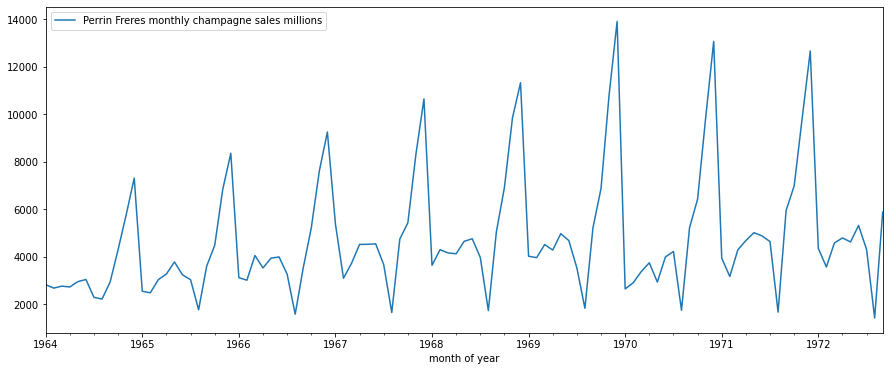

In [19]:
y.plot(figsize=(15, 6))
plt.show()

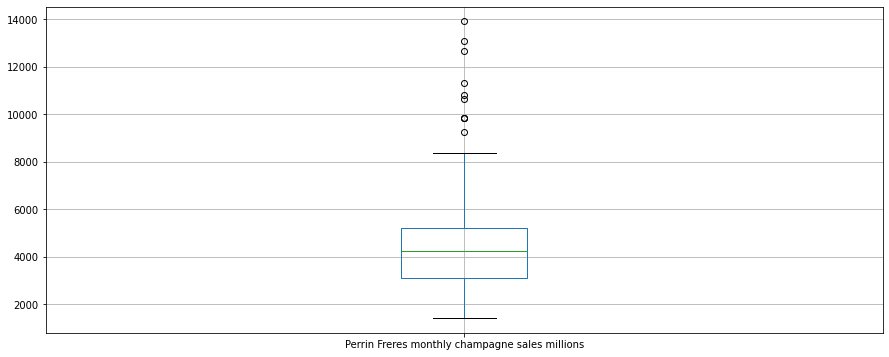

In [20]:
y.boxplot(figsize=(15, 6),)
plt.show()

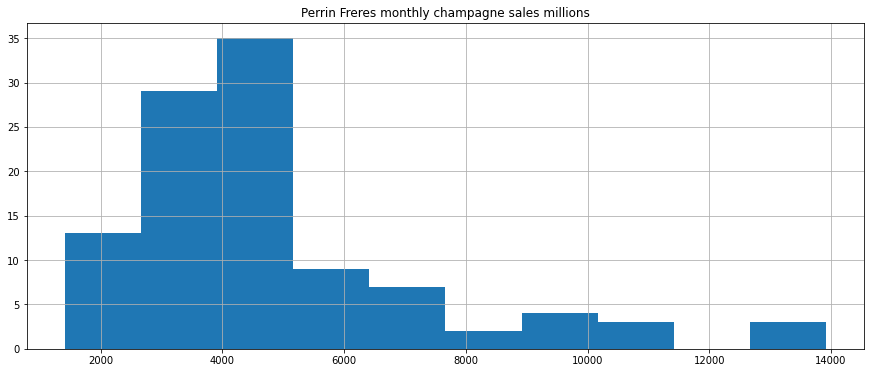

In [21]:
y.hist(figsize=(15, 6))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


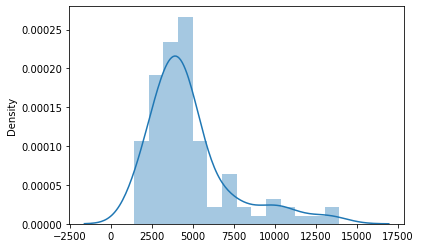

In [22]:
sns.distplot(y)         
plt.show()

here we are testing the stationarity of the dataset and  try to find out the optimal values for p,d,q parameters after achievib=ng the stationarity in the dataset.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


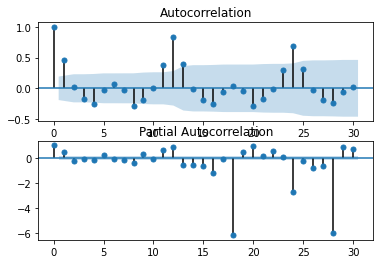

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()  # ACF PACF PLOTS
plt.subplot(211)
plot_acf(y['Perrin Freres monthly champagne sales millions'], ax=plt.gca(), lags = 30)    # y data (non stationary)
plt.subplot(212)
plot_pacf(y['Perrin Freres monthly champagne sales millions'], ax=plt.gca(), lags = 30)
plt.show()

# AUTOCORRELATION PLOTS   (p,q) for testing the stationarity with tuning of differencing.

In [26]:
ts = y['Perrin Freres monthly champagne sales millions'] - y['Perrin Freres monthly champagne sales millions'].shift(1)   
#differencing METHOD GIVES YOU A STATIONARY SERIES
#FOR ARIMA DIFFERENCING IS MUST
ts.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


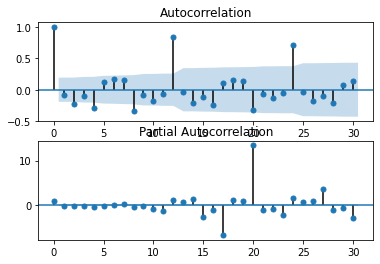

In [49]:
plt.figure()                                #AUTOCORRELATION PLOTS   (p,q)
plt.subplot(211)
plot_acf(ts, ax=plt.gca(),lags=30)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(),lags=30)
plt.show()

# ADF test

In [34]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [36]:
adf_test(y['Perrin Freres monthly champagne sales millions'])

ADF Statistics: -1.8335930563276188
p- value: 0.363915771660247
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [33]:
from statsmodels.tsa.stattools import adfuller
#H0:IT IS NON STATIONARY
#H1:IT IS  STATIONARY

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y['Perrin Freres monthly champagne sales millions'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.833593
p-value                         0.363916
#Lags Used                     11.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


so here we get the conclusion that p value which is more than than the value of alpha(0.05) so this states that we can't reject the null hypothesis.


# rolling mean statistics

In [29]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(30).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

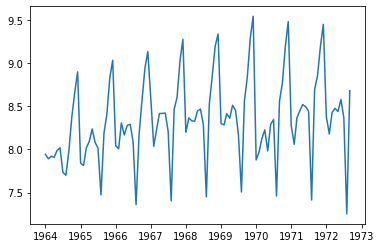

In [43]:
ts_log = np.log(y)  # USE LOG SCALE
plt.plot(ts_log)

using differencing of 1 and use logirithmic scale to atationarise the time series.

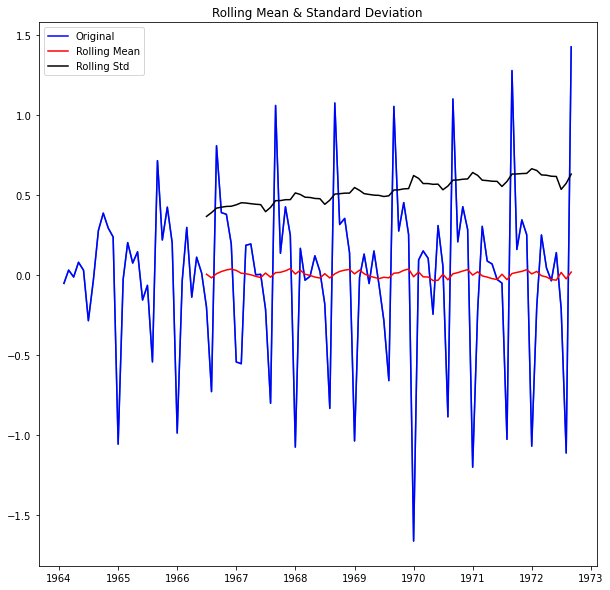

Results of Dickey-Fuller Test:
Test Statistic                 -4.460914
p-value                         0.000231
#Lags Used                     12.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [44]:
ts_log_diff = ts_log['Perrin Freres monthly champagne sales millions'] - ts_log['Perrin Freres monthly champagne sales millions'].shift(1)  # DIFFERENCING OREDER =1 ======ARIMA 
plt.figure(figsize=(10,10))
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)                           #stationary  series

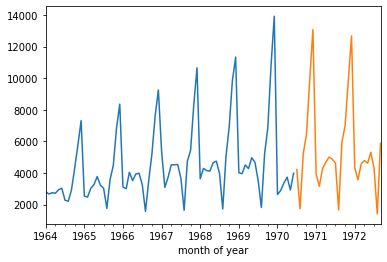

In [45]:
#divide into train and validation set
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]

#plotting the data
train['Perrin Freres monthly champagne sales millions'].plot()
valid['Perrin Freres monthly champagne sales millions'].plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


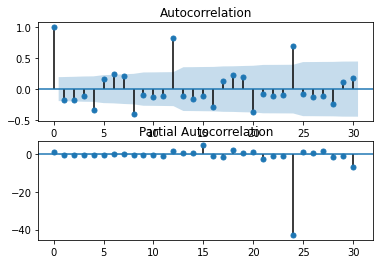

In [47]:
plt.figure()
plt.subplot(211)
plot_acf(ts_log_diff, ax=plt.gca(),lags=30)    
plt.subplot(212)
plot_pacf(ts_log_diff, ax=plt.gca(),lags=30)    # P=5 and Q=5   as  RECOMMENDED from the graph
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting ARIMA model


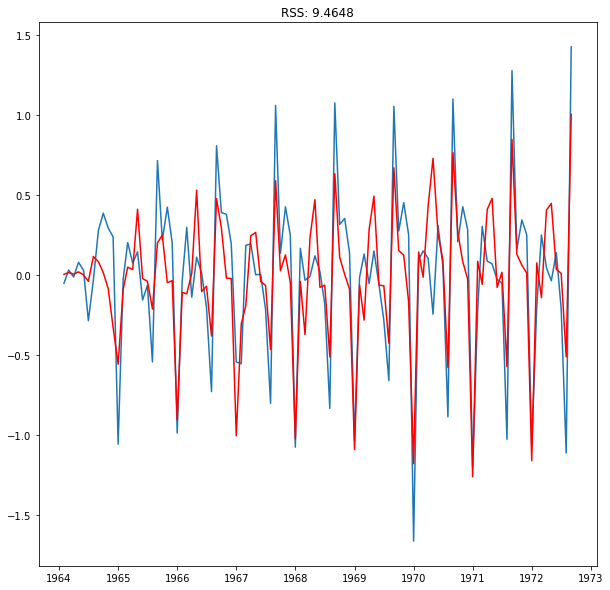

In [55]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(10,10))
model=ARIMA(ts_log , order=(5,1,5))  #log transformation
results=model.fit(disp=1)
plt.plot(ts_log_diff)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-ts_log_diff)**2))
print('plotting ARIMA model')

In [58]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

month of year
1964-02-01    0.004347
1964-03-01    0.015497
1964-04-01    0.005724
1964-05-01    0.019814
1964-06-01    0.000470
dtype: float64


In [59]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

month of year
1964-02-01    0.004347
1964-03-01    0.019844
1964-04-01    0.025568
1964-05-01    0.045383
1964-06-01    0.045853
dtype: float64


In [61]:
predictions_log=pd.Series(ts_log['Perrin Freres monthly champagne sales millions'].iloc[0], index=ts_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

month of year
1964-01-01    7.942718
1964-02-01    7.947065
1964-03-01    7.962562
1964-04-01    7.968286
1964-05-01    7.988100
dtype: float64

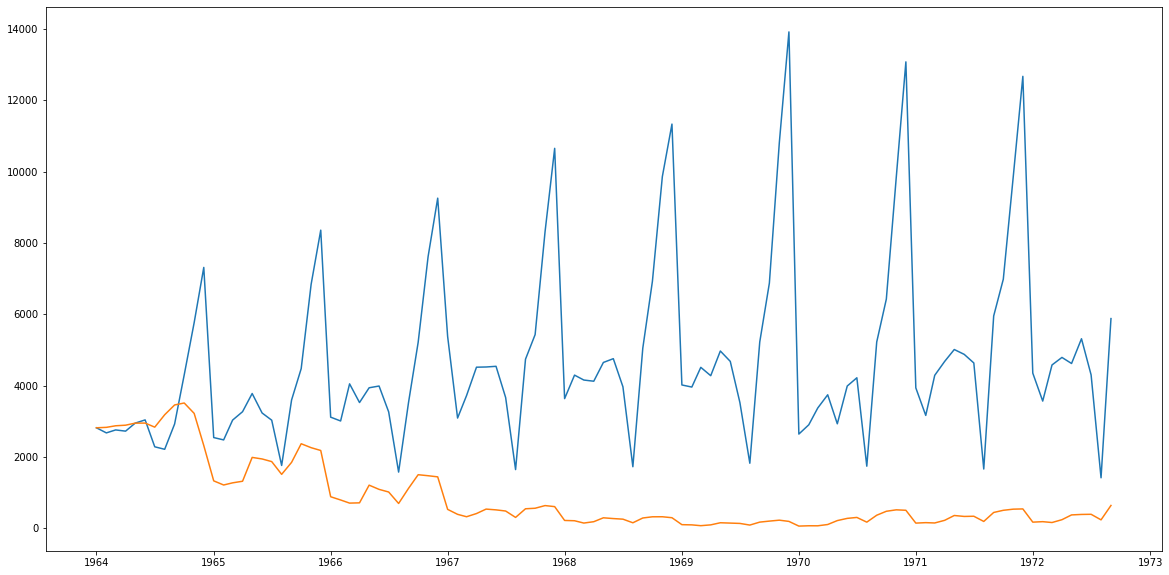

In [62]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(y)
plt.plot(predictions_ARIMA)

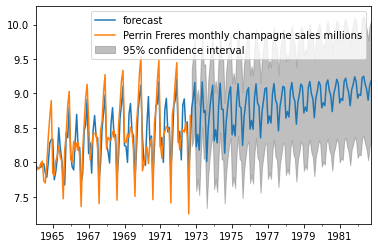

<Figure size 1440x720 with 0 Axes>

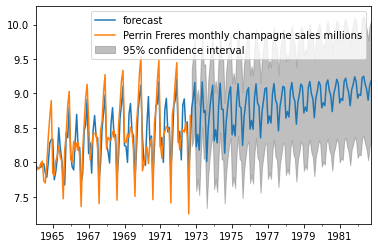

In [67]:
plt.figure(figsize=(20,10))
results.plot_predict(1,225)    #105 + 12*10     =120+105=225    

# AR model where q=0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting AR model


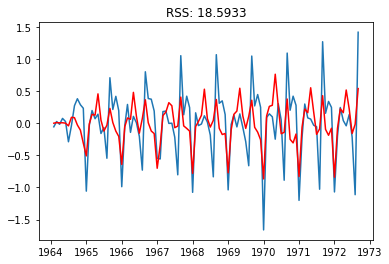

In [69]:
model1=ARIMA(ts_log , order=(5,1,0))#AR MODEL
results1=model1.fit(disp=1)
plt.plot(ts_log_diff)
plt.plot(results1.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results1.fittedvalues-ts_log_diff)**2))
print('plotting AR model')

# MA model where p=0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting ma model


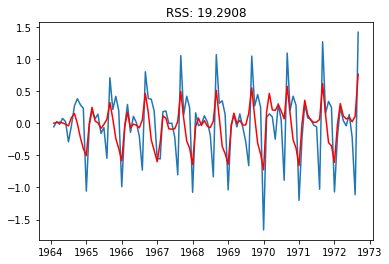

In [70]:
model1=ARIMA(ts_log , order=(0,1,2))#MA MODEL
results1=model1.fit(disp=1)
plt.plot(ts_log_diff)
plt.plot(results1.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results1.fittedvalues-ts_log_diff)**2))
print('plotting ma model')

# just example only

In [73]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model

model = ARIMA(train, order=(1, 1, 1))    #
model_fit = model.fit(disp=1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
